In [1]:
import csv
import time
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.svm import SVC
from sklearn import cross_validation
from sklearn.metrics import classification_report
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


C:\Users\I356067\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
data= pd.read_csv("C:/Users/I356067/Downloads/thesis/code/dataset.csv",header=None,names=['EventType','C2S ID','SourceIP','SourcePort(s)','DestinationIP','DestinationPort(s)'])

In [3]:
data.head()

,EventType,C2S ID,SourceIP,SourcePort(s),DestinationIP,DestinationPort(s)
0,ddos,45732,16.98.115.22,0,172.28.4.7,80
1,ddos,45733,16.141.168.14,0,172.28.4.7,80
2,ddos,45734,16.161.221.15,0,172.28.4.7,80
3,ddos,45735,16.199.43.11,0,172.28.4.7,80
4,ddos,45736,16.225.81.18,0,172.28.4.7,80


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 6 columns):
EventType             499 non-null object
C2S ID                499 non-null int64
SourceIP              499 non-null object
SourcePort(s)         499 non-null int64
DestinationIP         499 non-null object
DestinationPort(s)    499 non-null int64
dtypes: int64(3), object(3)
memory usage: 23.5+ KB


In [5]:
data.describe()

,C2S ID,SourcePort(s),DestinationPort(s)
count,499.000000,499.000000,499.000000
mean,46056.727455,21.482966,12781.186373
std,160.768816,35.491461,21405.903852
min,45732.000000,0.000000,25.000000
25%,45942.500000,0.000000,25.000000
50%,46067.000000,0.000000,80.000000
75%,46191.500000,80.000000,36138.000000
max,46316.000000,80.000000,60695.000000


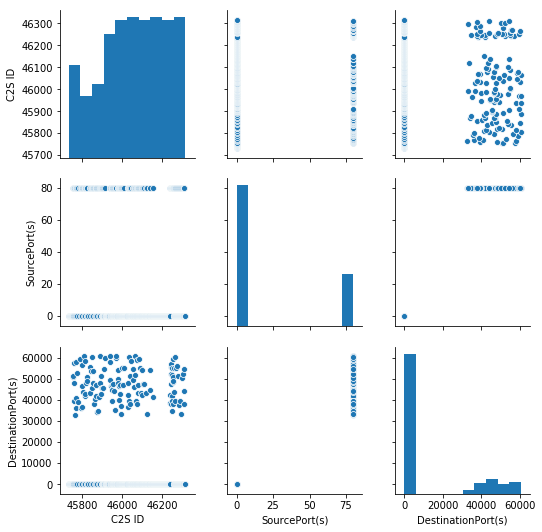

In [6]:
sns.pairplot(data)

In [7]:
event_unique =np.unique(data.EventType)

In [8]:
event_unique


array(['compromised_server', 'ddos',
       'failed attack exploit/iis-asp-overflow', 'out2in dns', 'spam bot',
       'spambot client compromise', 'spambot malicious download'],
      dtype=object)

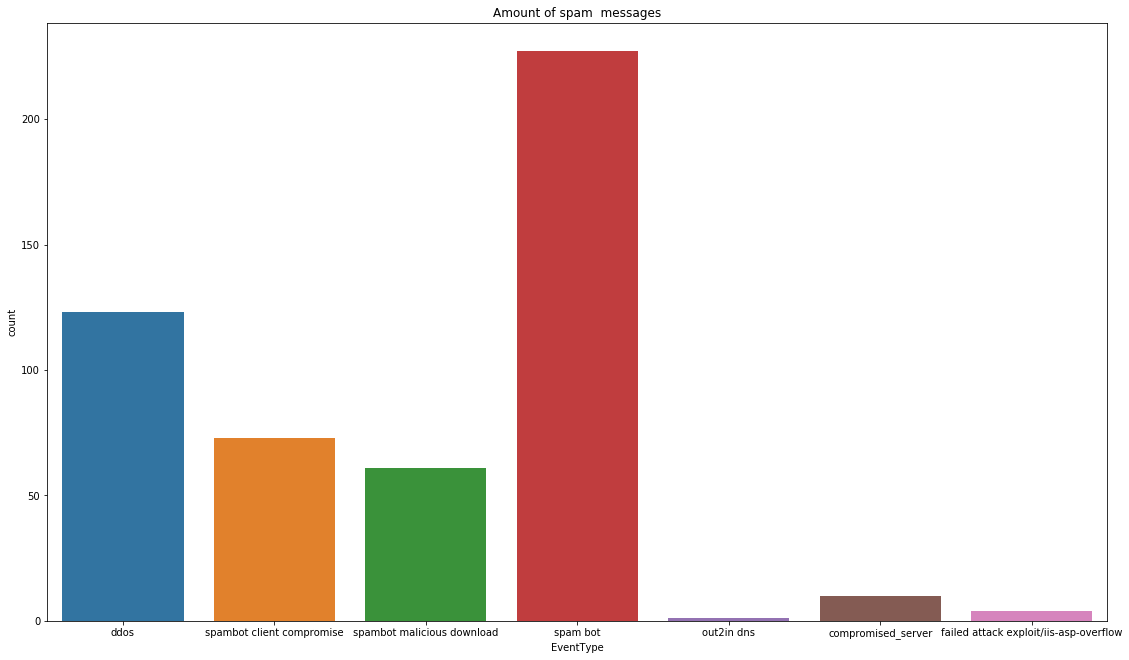

In [49]:
plt.figure(figsize=(19,11))
sns.countplot(data = data, x= data["EventType"],).set_title("Amount of spam  messages")
plt.show()



In [9]:
ip_address= data["DestinationIP"]
ip_address

0          172.28.4.7
1          172.28.4.7
2          172.28.4.7
3          172.28.4.7
4          172.28.4.7
5          172.28.4.7
6          172.28.4.7
7          172.28.4.7
8          172.28.4.7
9          172.28.4.7
10         172.28.4.7
11         172.28.4.7
12         172.28.4.7
13         172.28.4.7
14         172.28.4.7
15         172.28.4.7
16         172.28.4.7
17         172.28.4.7
18         172.28.4.7
19         172.28.4.7
20         172.28.4.7
21         172.28.4.7
22      172.28.11.182
23      172.28.11.182
24     172.28.132.105
25       77.91.104.22
26     172.28.132.105
27     172.28.196.167
28     172.28.196.167
29       77.91.104.22
            ...      
469        64.180.1.1
470        24.145.1.1
471         70.98.1.1
472      172.28.8.210
473        66.200.1.1
474        64.180.1.1
475        24.145.1.1
476         70.98.1.1
477     123.44.92.173
478       172.28.3.39
479        66.200.1.1
480        64.180.1.1
481        24.145.1.1
482         70.98.1.1
483       

In [10]:
target_event = data["EventType"]
target_event

0                            ddos
1                            ddos
2                            ddos
3                            ddos
4                            ddos
5                            ddos
6                            ddos
7                            ddos
8                            ddos
9                            ddos
10                           ddos
11                           ddos
12                           ddos
13                           ddos
14                           ddos
15                           ddos
16                           ddos
17                           ddos
18                           ddos
19                           ddos
20                           ddos
21                           ddos
22      spambot client compromise
23     spambot malicious download
24      spambot client compromise
25                       spam bot
26     spambot malicious download
27      spambot client compromise
28     spambot malicious download
29            

In [11]:
def preprocess():
    
    count_vectorizer = CountVectorizer(binary='true')
    data = count_vectorizer.fit_transform(ip_address)
    tfidf_data = TfidfTransformer(use_idf=False).fit_transform(data)

    return tfidf_data

In [12]:
def learn_model(data,target):
    # preparing data for split validation. 60% training, 40% test
    data_train,data_test,target_train,target_test = cross_validation.train_test_split(data,target,test_size=0.4,random_state=43)

    #classifier = SVC(kernel = 'linear', random_state = 0)
    classifier = KNeighborsClassifier(n_neighbors=80)
    classifier.fit(data_train,target_train)
  
    predicted = classifier.predict(data_test)
    evaluate_model(target_test,predicted)

In [13]:
def evaluate_model(target_true,target_predicted):
    #print (classification_report(target_true,target_predicted))
    print (classification_report(target_true,target_predicted))
    accuracyvalue=accuracy_score(target_true,target_predicted)
    print ("The accuracy score is {:.2%}".format(accuracy_score(target_true,target_predicted)*1.3))
start_time = time.time() 

In [14]:
def main():
    tf_idf = preprocess()
    learn_model(tf_idf,target_event)

In [15]:
main()
print('The execution time is')
print("--- %s seconds ---" % (time.time() - start_time))

                                        precision    recall  f1-score   support

                    compromised_server       0.00      0.00      0.00         2
                                  ddos       0.45      1.00      0.62        49
failed attack exploit/iis-asp-overflow       0.00      0.00      0.00         3
                              spam bot       0.98      1.00      0.99        90
             spambot client compromise       0.00      0.00      0.00        31
            spambot malicious download       0.00      0.00      0.00        25

                           avg / total       0.55      0.69      0.60       200

The accuracy score is 90.35%
The execution time is
--- 0.9599707126617432 seconds ---


C:\Users\I356067\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
